# Intro
These are my notes as I do "introduction_to_ml_with_python"

https://github.com/amueller/introduction_to_ml_with_python

# The DataSet - Iris

In [29]:
from sklearn.datasets import load_iris
import numpy as np

iris_dataset = load_iris()

iris_dataset.keys()

print("DESCRIPTION")
print(iris_dataset['DESCR'][:193] + "\n ...")

print("target_names")
print("---")
print(iris_dataset['target_names'])
print("")

print("feature_names")
print("---")
print(iris_dataset [ 'feature_names' ])
print("")

print('{}'.format(type ( iris_dataset [ 'data' ])))


DESCRIPTION
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
 ...
target_names
---
['setosa' 'versicolor' 'virginica']

feature_names
---
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

<type 'numpy.ndarray'>


In [2]:
print("SHAPE")
print("---")
print(iris_dataset['data'].shape)
print()

SHAPE
---
(150, 4)
()


In [3]:
iris_dataset [ 'data' ][: 5 ]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

# Training and Testing

In [4]:
from sklearn.model_selection import train_test_split
import datetime

I considered using epoch as random seed but can only take 2\*\*32-1 as largest number.
Docs say "random_state=0" but looks like it might be better to just _not_ set it and use defaul value "None" which uses "np.random".

reference: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html instead did not set 

other stuff:

shuffle : boolean, optional (default=True)

In [45]:
X_train,X_test,y_train,y_test = train_test_split(iris_dataset['data'],iris_dataset['target'])

In [46]:
X_train[:5]

array([[6.7, 3.3, 5.7, 2.1],
       [6.9, 3.1, 5.1, 2.3],
       [6.3, 2.8, 5.1, 1.5],
       [5.9, 3. , 5.1, 1.8],
       [7.4, 2.8, 6.1, 1.9]])

In [47]:
X_test[1:5]

array([[6.9, 3.1, 5.4, 2.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.1, 2.8, 4. , 1.3],
       [4.8, 3.4, 1.6, 0.2]])

In [48]:
y_train

array([2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 2,
       2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0,
       0, 0, 1, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 1, 0, 2, 0, 2, 1, 0, 1, 1,
       0, 1, 0, 1, 2, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2,
       1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 0, 0, 1, 1, 0, 0, 2,
       1, 1])

In [49]:
y_test

array([2, 2, 0, 1, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 2,
       1, 1, 0, 2, 0, 2, 1, 2, 0, 2, 0, 0, 1, 1, 1, 2])

In [50]:
print ( "X_train shape: %s " % str ( X_train . shape ))
print ( "y_train shape: %s " % str ( y_train . shape ))

X_train shape: (112, 4) 
y_train shape: (112,) 


In [51]:
print ( "X_test shape: %s " % str ( X_test . shape ))
print ( "y_test shape: %s " % str ( y_test . shape ))

X_test shape: (38, 4) 
y_test shape: (38,) 


Examine the data, make a matrix of 2d comparisons

In [52]:
import pandas as pd
import mglearn

# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names

iris_dataframe = pd.DataFrame( X_train, columns=iris_dataset.feature_names )

Lets looks at the data

In [53]:
iris_dataframe[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.7,3.3,5.7,2.1
1,6.9,3.1,5.1,2.3
2,6.3,2.8,5.1,1.5
3,5.9,3.0,5.1,1.8
4,7.4,2.8,6.1,1.9


create a scatter matrix from the dataframe, color by y_train

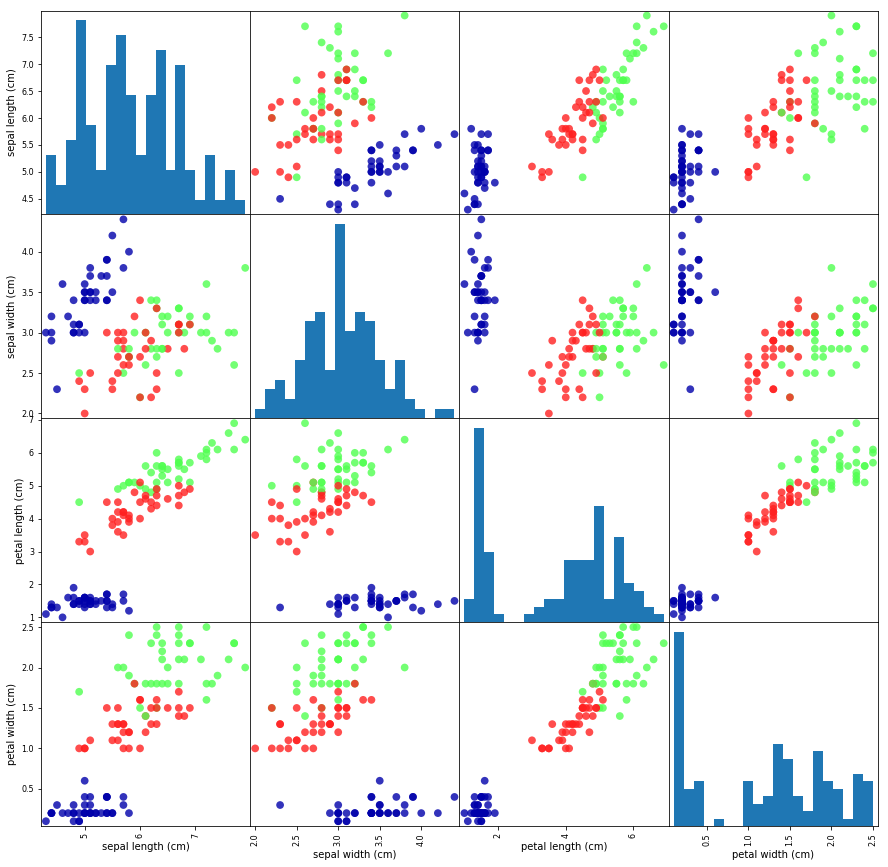

In [54]:
grr = pd.plotting.scatter_matrix( iris_dataframe, c=y_train, figsize=(15,15 ), marker='o' , hist_kwds={ 'bins':20}, s=60 , alpha=.8 , cmap =mglearn.cm3 )

Building your first model: k nearest neighbors

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier ( n_neighbors = 1 )

In [56]:
knn.fit ( X_train , y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

now try to make a prediction.

In [57]:
X_new = np.array([[ 5 , 2.9 , 1 , 0.2 ]])

X_new.shape

prediction = knn.predict( X_new )
prediction 

iris_dataset [ 'target_names' ][ prediction ]


array(['setosa'], dtype='|S10')

yay! I got something back , but was it correct? With out being in the field and looking at the plan.. I don't know. Recall tihs is unlabeled data. Instead, lets use our labeled data to check out work.

Ok now feed the prediction model ( knn.predict) all of the test data ( X_test) and see how it does by comparing it to the actual labels on the test data ( y_test ).

''Measure accuracy''

Accuracy - the fraction of flowers for which the right species was predicted.

note the term "y_pred == y_test"

This takes two arrays and compares them

if y_pred[i] is the same as to y_test[i] then results_arr[i] is 1 (True) else zero 0 ( False ).

The mean of the restuls is the accuarcy

In [58]:
y_pred = knn . predict ( X_test )
y_pred

results_arr = y_pred == y_test
results_arr

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [59]:
print ( "score: %.2f " % np.mean( y_pred == y_test ))

score: 1.00 


it's also possible to use the "score" method to get the number

In [60]:
print ( "score: %.2f " % knn.score ( X_test , y_test ))

score: 1.00 


now lets fiddle with neighbors and see how that goes.

In [44]:
X_train , X_test , y_train , y_test = train_test_split ( iris_dataset [ 'data' ], iris_dataset [ 'target' ] )

knn = KNeighborsClassifier ( n_neighbors = 2 )

knn . fit ( X_train , y_train )
print ( "score: %.2f " % knn . score ( X_test , y_test ))


score: 0.92 


In [62]:
X_train , X_test , y_train , y_test = train_test_split ( iris_dataset [ 'data' ], iris_dataset [ 'target' ] )

knn = KNeighborsClassifier ( n_neighbors = 4 )

knn . fit ( X_train , y_train )
print ( "score: %.2f " % knn . score ( X_test , y_test ))


score: 0.97 


In [63]:
X_train , X_test , y_train , y_test = train_test_split ( iris_dataset [ 'data' ], iris_dataset [ 'target' ])

knn = KNeighborsClassifier ( n_neighbors = 1 )

knn . fit ( X_train , y_train )
print ( "score: %.2f " % knn . score ( X_test , y_test ))


score: 0.92 


End of chapter 1

Now that I got new numbers everytime I ran a model. The n_neighbors value didn't seem to have and effect on accuracy . ( need to try and run this 100s if not 10,000s of time and graph the results.) 